In [32]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading
df = pd.read_csv("./sample_data/data_jobs.csv")

In [33]:
# Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [34]:
df = df.loc[df["job_country"] == "France"].copy()

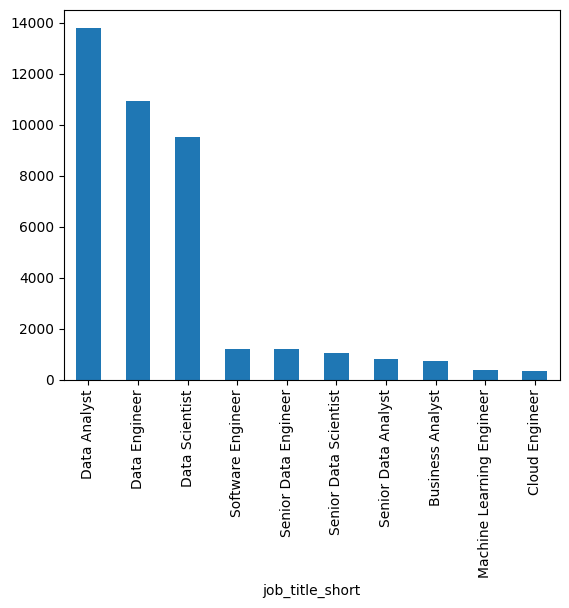

In [35]:
# create a simple subplot
fig, ax = plt.subplots()

# plot the data
df['job_title_short'].value_counts().plot(kind='bar', ax=ax)
plt.show()

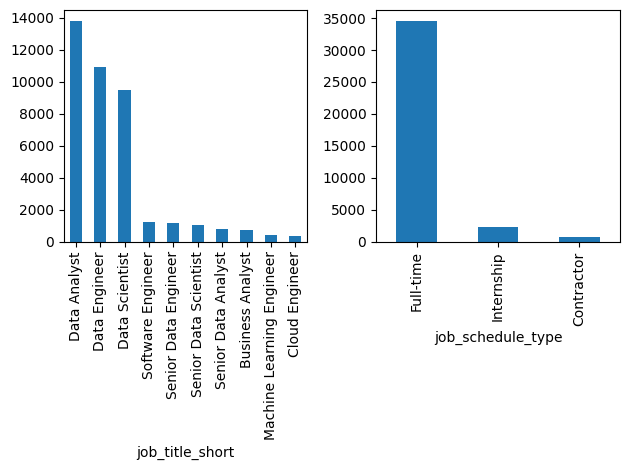

In [36]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

# fix the overlap
fig.tight_layout()

plt.show()

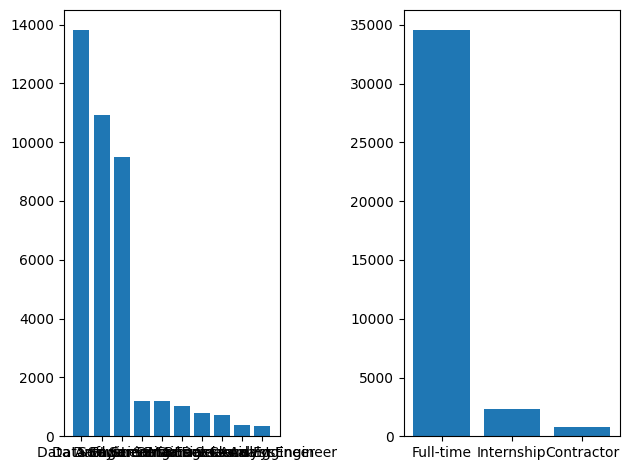

In [37]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()

In [38]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
944,python,Data Scientist,6320
1211,sql,Data Analyst,6213
943,python,Data Engineer,6188
1212,sql,Data Engineer,5319
942,python,Data Analyst,4506
...,...,...,...
31,angular.js,Software Engineer,1
1457,wsl,Data Engineer,1
27,angular,Senior Data Analyst,1
20,alteryx,Software Engineer,1


In [39]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = job_titles[:3]

job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

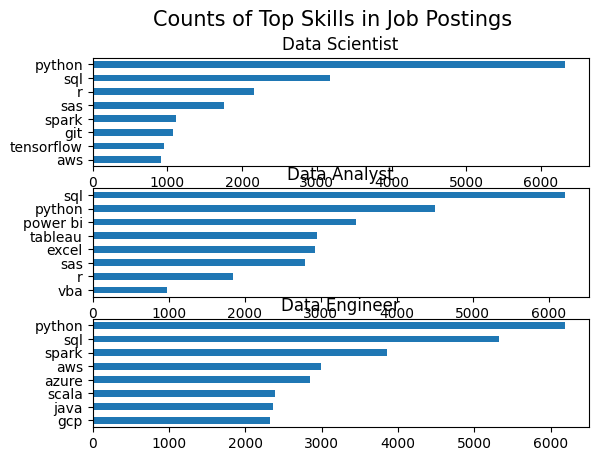

In [48]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(8)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
plt.show()

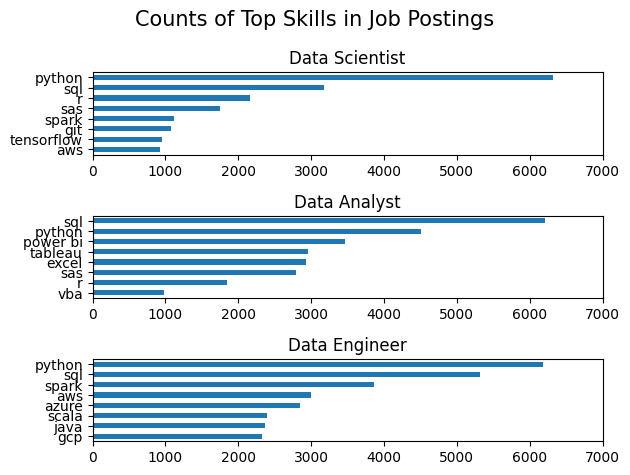

In [51]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(8).plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 7000) # make the scales the same

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() # fix the overlap
plt.show()